>> ## Data Breach Analytics 2005 - 2017 
> (Part IV - Supervised Text Classification Modeling part 2 non-text features)
#### by Miriam Rodriguez

Classification models need to be created to determine the risk of a data breach:
- the likelihood of a specific type of breach
- which organization type is likely to be hit
- what is the correlation

Separate the features to predict each type of breach and which organizations are affected

Organizations could develop security systems as a result of this study.


# Importing packages 

In [12]:
import warnings
warnings.filterwarnings(action= 'ignore')  # To ignore all warnings that arise here to enhance clarity

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from pandas.core import datetools

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## Read cleaned data

In [14]:
#import breach data ... open or read the bank data
df=pd.read_csv("databreach_cleaned.csv")
print df.head()


   Breach_Year                                         Company          State  \
0         2006                       Deloitte & Touche, McAfee  United States   
1         2007                   TennCare, Americhoice Inc.     United States   
2         2007                      Mercer Health and Benefits  United States   
3         2007  Fidelity Investments, Dairy Farmers of America  United States   
4         2007                                      Dai Nippon  United States   

  Breach_Type Organization_Type  Total_Recs  \
0        PORT               BSO        9290   
1        PORT               MED       67000   
2        PORT               BSF       10500   
3        PORT               BSF          69   
4        INSD               BSO           0   

                                         Description   Latitude  Longitude  \
0  An external auditor lost a CD with names, Soci...  37.090240 -95.712891   
1  There are 67,000 TennCare \r\n            enro...  35.960638 -83.920739

# Data Prep

In [15]:
#drop or remove the columns not used in the analysis and display the result
df_stat = df.drop(['GDP', 'Latitude', 'Longitude', 'Breach_Type', 'Organization_Type', 'State', 'Company', 'Description', 'Year_CAT'], axis=1)
df_stat.head()


,Breach_Year,Total_Recs,Breach_Type_CAT,Organization_Type_CAT,State_CAT
0,2006,9290,5,2,0
1,2007,67000,5,6,0
2,2007,10500,5,1,0
3,2007,69,5,1,0
4,2007,0,3,2,0


In [16]:
#describe the data

df_stat.describe()


,Breach_Year,Total_Recs,Breach_Type_CAT,Organization_Type_CAT,State_CAT
count,8177.000000,8.177000e+03,8177.000000,8177.000000,8177.000000
mean,2012.204965,1.283333e+06,4.015042,4.534915,23.191513
std,3.425944,3.955638e+07,1.992745,1.825506,15.301632
min,2005.000000,0.000000e+00,0.000000,1.000000,0.000000
25%,2010.000000,0.000000e+00,2.000000,3.000000,9.000000
50%,2012.000000,9.000000e+02,4.000000,6.000000,21.000000
75%,2015.000000,5.511000e+03,5.000000,6.000000,36.000000
max,2018.000000,3.000000e+09,7.000000,7.000000,52.000000


In [17]:
#show the information about the dataset
df_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8177 entries, 0 to 8176
Data columns (total 5 columns):
Breach_Year              8177 non-null int64
Total_Recs               8177 non-null int64
Breach_Type_CAT          8177 non-null int64
Organization_Type_CAT    8177 non-null int64
State_CAT                8177 non-null int64
dtypes: int64(5)
memory usage: 319.5 KB


# Classification Model building

In [18]:
# rename columns Harm
df_stat = df_stat.rename(columns={'Total_Recs': 'Harm'})

In [19]:
df_stat

,Breach_Year,Harm,Breach_Type_CAT,Organization_Type_CAT,State_CAT
0,2006,9290,5,2,0
1,2007,67000,5,6,0
2,2007,10500,5,1,0
3,2007,69,5,1,0
4,2007,0,3,2,0
5,2007,9297,7,6,0
6,2008,0,5,2,0
7,2009,0,4,5,0
8,2009,9000,2,4,0
9,2010,1073,4,6,0


## Decision Tree Model Building, Validation, Evaluation


In [21]:
#set X, y value
y = df_stat['Organization_Type_CAT']
X = df_stat.drop(['Organization_Type_CAT'], axis=1)

In [22]:
# evaluate the model by splitting into train (70%) and test sets (30%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=75)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=75, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

>Observation - By adjusting the max_depth to 6 and min samples to 5, improved accuracy of model

In [23]:
#Model evaluation

print  metrics.accuracy_score(y_test, dt.predict(X_test))
print  metrics.confusion_matrix(y_test, dt.predict(X_test))
print  metrics.classification_report(y_test, dt.predict(X_test))
#print  metrics.roc_auc_score(y_test, dt.predict(X_test))

0.58435207824
[[  61   18   33   18    8   79    0]
 [  36   98   42   16    9  106    0]
 [  25   16   65   12    6   83    0]
 [  35    9   24   58   20   71    0]
 [  55   11   25   25   17   88    0]
 [  53   22    8   14   15 1135    0]
 [   9    2    4    3    1   19    0]]
             precision    recall  f1-score   support

          1       0.22      0.28      0.25       217
          2       0.56      0.32      0.41       307
          3       0.32      0.31      0.32       207
          4       0.40      0.27      0.32       217
          5       0.22      0.08      0.11       221
          6       0.72      0.91      0.80      1247
          7       0.00      0.00      0.00        38

avg / total       0.54      0.58      0.55      2454



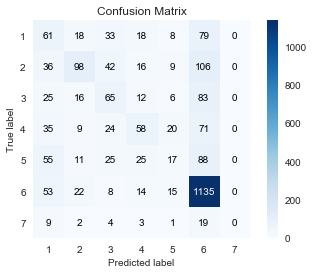

In [24]:
from scikitplot import plotters as skplt

skplt.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

#### Institution/Organization) Type
Numeric/ Alpha/  Description
- 1     BSF - Businesses - Financial and Insurance Services
- 2	    BSO - Businesses - Other
- 3  	BSR - Businesses - Retail/Merchant – Including Online Retail
- 4 	EDU - Educational Institutions
- 5 	GOV - Government & Military
- 6 	MED - Healthcare - Medical Providers & Medical Insurance Services
- 7 	NGO - Nonprofit Organizations

Question: Interpret the results of confusion matrix
    
- The decision tree model went from 52% to 58% accurate when adjusting the depth and number of leaves. Therefore, we expect that the model will be about 58% accurate when the model is applied into a real-world situation 
- Medical is showing the most accurate prediction of all at 1135. 
- Overall accuracy calculated as correctly classified 2454 total in test dsn = 58%

In [25]:
# visualize decision tree
X_org_df = pd.DataFrame(X)
X_org_df = X_org_df.rename(columns={0: 'BSF', 1: 'BSO', 2: 'BSR', 3: 'EDU', 4: 'GOV', 5: 'MED', 6: 'NGO'})
tree.export_graphviz(dt, out_file='decisiontree_m.dot', feature_names=X_org_df.columns)

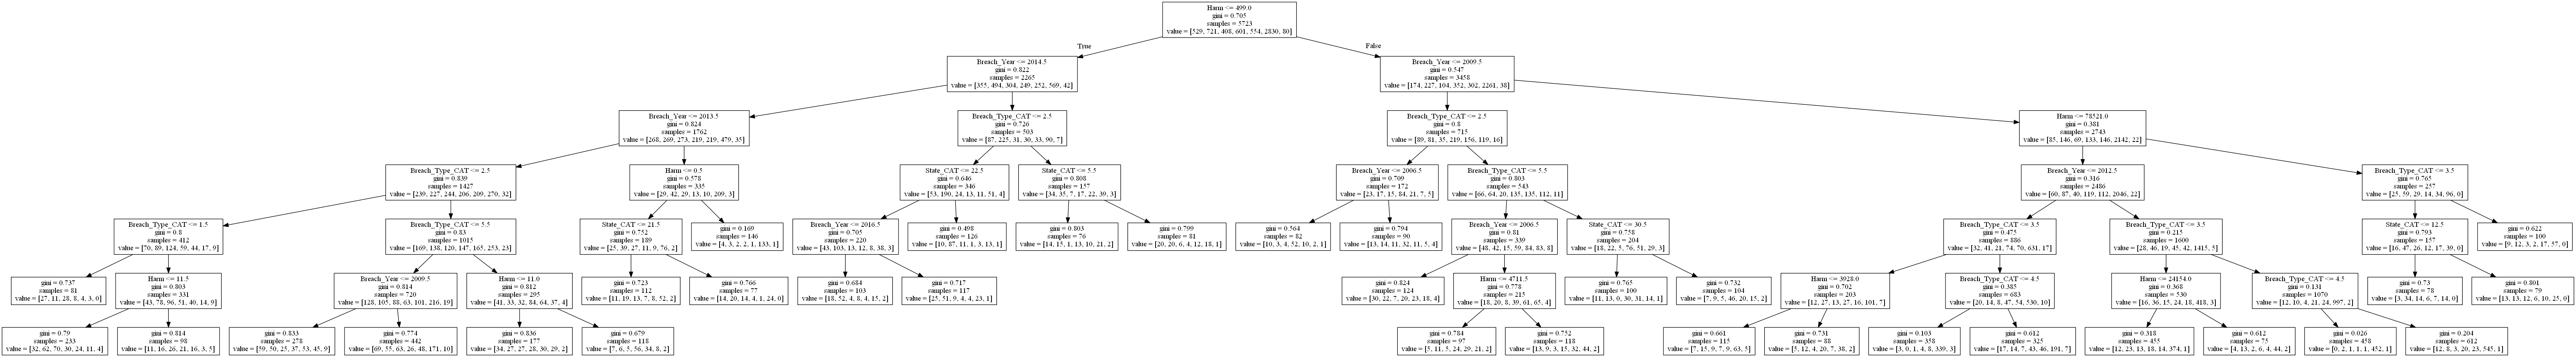

In [26]:
# embed the decision tree
from IPython.display import Image
Image("decisiontree_m.png")

## Model Creation and Deployment: Predict y values using the decision tree classifiers.
- Create and load scoringdataset.csv (scoring dataset). This dataset has no y value, representing the future. Decision model will be deployed to determine if we can predict the type of breach.

#### Model Deployment

In [27]:
df_score_org = df_stat.drop(['Organization_Type_CAT'], axis=1)
df_score_org.head()

,Breach_Year,Harm,Breach_Type_CAT,State_CAT
0,2006,9290,5,0
1,2007,67000,5,0
2,2007,10500,5,0
3,2007,69,5,0
4,2007,0,3,0


In [28]:
df_score_org.to_csv("scoringdataset_org.csv",index=False)

In [30]:
# load scoringdataset_org.csv
score_org=pd.read_csv("scoringdataset_org.csv")
print score_org.head()

   Breach_Year   Harm  Breach_Type_CAT  State_CAT
0         2006   9290                5          0
1         2007  67000                5          0
2         2007  10500                5          0
3         2007     69                5          0
4         2007      0                3          0


In [31]:
# finally generate the predicted y value
predictedY = dt.predict(score_org)
predictedY

array([1, 6, 6, ..., 2, 6, 6], dtype=int64)

In [32]:
predictedY = pd.DataFrame(predictedY, columns=['predicted Y'])
predictedY.head(20)

,predicted Y
0,1
1,6
2,6
3,1
4,1
5,5
6,1
7,1
8,4
9,6


In [33]:
data_org = score_org.join(predictedY) 
data_org.head(20)

,Breach_Year,Harm,Breach_Type_CAT,State_CAT,predicted Y
0,2006,9290,5,0,1
1,2007,67000,5,0,6
2,2007,10500,5,0,6
3,2007,69,5,0,1
4,2007,0,3,0,1
5,2007,9297,7,0,5
6,2008,0,5,0,1
7,2009,0,4,0,1
8,2009,9000,2,0,4
9,2010,1073,4,0,6


In [34]:
# Check organization type category column to see if matches predicted Y
df_stat.head(20)

,Breach_Year,Harm,Breach_Type_CAT,Organization_Type_CAT,State_CAT
0,2006,9290,5,2,0
1,2007,67000,5,6,0
2,2007,10500,5,1,0
3,2007,69,5,1,0
4,2007,0,3,2,0
5,2007,9297,7,6,0
6,2008,0,5,2,0
7,2009,0,4,5,0
8,2009,9000,2,4,0
9,2010,1073,4,6,0


In [47]:
# evaluate the decision tree model using 10-fold cross-validation
cross_scores = cross_val_score(dt, X, y, scoring='accuracy', cv=10)
print cross_scores
print cross_scores.mean()

[ 0.51585366  0.50487805  0.52804878  0.57317073  0.58902439  0.56601467
  0.54589963  0.58333333  0.57564576  0.57687577]
0.555874477103


### Organization Type had some misses


> # Logistic Regression
- For logistic regression & logit, create dummy variables for categorical columns
- When declaring X and y, X_lr and y_lr will be used to not to overwrite X and y since X and y will be used for knn and other algorithms (e.g., random forest, extratreeclassifier)


In [36]:
print df_stat.dtypes

Breach_Year              int64
Harm                     int64
Breach_Type_CAT          int64
Organization_Type_CAT    int64
State_CAT                int64
dtype: object


In [52]:
Org_Type_dm = pd.get_dummies(df_stat['Organization_Type_CAT'], prefix='Org_Type')
df_stat_sp = df_stat.join(Org_Type_dm)
df_stat_sp.head()

,Breach_Year,Harm,Breach_Type_CAT,Organization_Type_CAT,State_CAT,Org_Type_1,Org_Type_2,Org_Type_3,Org_Type_4,Org_Type_5,Org_Type_6,Org_Type_7
0,2006,9290,5,2,0,0,1,0,0,0,0,0
1,2007,67000,5,6,0,0,0,0,0,0,1,0
2,2007,10500,5,1,0,1,0,0,0,0,0,0
3,2007,69,5,1,0,1,0,0,0,0,0,0
4,2007,0,3,2,0,0,1,0,0,0,0,0


In [53]:
df_stat_sp = df_stat_sp.rename(columns={'Org_Type_1': 'Finance', 'Org_Type_2': 'Other', 'Org_Type_3': 'Retail', 'Org_Type_4': 'Education', 'Org_Type_5': 'Government', 'Org_Type_6': 'Medical', 'Org_Type_7': 'NonProfit'})
df_stat_sp.head(2)

,Breach_Year,Harm,Breach_Type_CAT,Organization_Type_CAT,State_CAT,Finance,Other,Retail,Education,Government,Medical,NonProfit
0,2006,9290,5,2,0,0,1,0,0,0,0,0
1,2007,67000,5,6,0,0,0,0,0,0,1,0


In [54]:
df_stat_sp = df_stat_sp.drop(['Organization_Type_CAT'], axis=1)
df_stat_sp.head()

,Breach_Year,Harm,Breach_Type_CAT,State_CAT,Finance,Other,Retail,Education,Government,Medical,NonProfit
0,2006,9290,5,0,0,1,0,0,0,0,0
1,2007,67000,5,0,0,0,0,0,0,1,0
2,2007,10500,5,0,1,0,0,0,0,0,0
3,2007,69,5,0,1,0,0,0,0,0,0
4,2007,0,3,0,0,1,0,0,0,0,0


In [55]:
# correlation analysis & heatmap
print df_stat_sp.corr()

                 Breach_Year      Harm  Breach_Type_CAT  State_CAT   Finance  \
Breach_Year         1.000000  0.026553        -0.105561  -0.066180 -0.116158   
Harm                0.026553  1.000000        -0.014990  -0.010136 -0.003372   
Breach_Type_CAT    -0.105561 -0.014990         1.000000   0.038525 -0.036496   
State_CAT          -0.066180 -0.010136         0.038525   1.000000 -0.026117   
Finance            -0.116158 -0.003372        -0.036496  -0.026117  1.000000   
Other               0.058932  0.067756        -0.158549  -0.032109 -0.120149   
Retail             -0.057129 -0.000176        -0.134333  -0.022117 -0.090358   
Education          -0.259685 -0.010558         0.052915   0.022119 -0.105636   
Government         -0.206075 -0.008098         0.085351  -0.005687 -0.102523   
Medical             0.346661 -0.030928         0.116079   0.036898 -0.315954   
NonProfit          -0.050943 -0.003707        -0.003487   0.004852 -0.038339   

                    Other    Retail  Ed

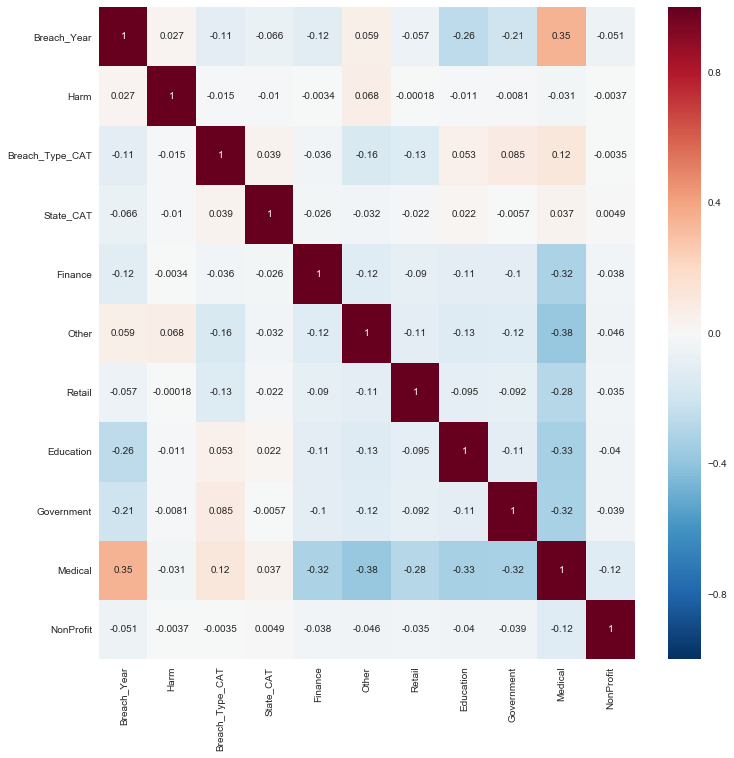

In [56]:
plt.figure(figsize=(12,12))
sns.heatmap(df_stat_sp.corr(), annot=True)

What are the findings from correlation analysis?
- The higher values seem to occur with medical and harm.
- Retail and medical have a negative correlation.
- Medical has a positive correlation with the other organizatons.
- For the most part the correlation scores appear to be low.


In [57]:
# declaring X_lr, y_lr (instead of X and y) for Organization Type.
y_lr = df_stat['Organization_Type_CAT']
X_lr = df_stat.drop(['Organization_Type_CAT'], axis=1)

In [58]:
X_lr.head(2)

,Breach_Year,Harm,Breach_Type_CAT,State_CAT
0,2006,9290,5,0
1,2007,67000,5,0


In [59]:
# evaluate the model by splitting into train and test sets (split validation) 70%/30%

X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
#Split valuation. 
#Report the following model evaluation metrics: overall model accuracy, confusion matrix, AUC score, classification report
print  metrics.accuracy_score(y_test, lr.predict(X_test))
print  metrics.confusion_matrix(y_test, lr.predict(X_test))
print  metrics.classification_report(y_test, lr.predict(X_test))
#print  metrics.roc_auc_score(y_test, lr.predict(X_test))

0.512224938875
[[   0    1    0    0    0  216    0]
 [   0   10    0    0    0  297    0]
 [   0    3    0    0    0  204    0]
 [   0    0    0    0    0  217    0]
 [   0    1    0    0    0  220    0]
 [   0    0    0    0    0 1247    0]
 [   0    0    0    0    0   38    0]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       217
          2       0.67      0.03      0.06       307
          3       0.00      0.00      0.00       207
          4       0.00      0.00      0.00       217
          5       0.00      0.00      0.00       221
          6       0.51      1.00      0.68      1247
          7       0.00      0.00      0.00        38

avg / total       0.34      0.51      0.35      2454



**51% model accuracy for Organization Type**


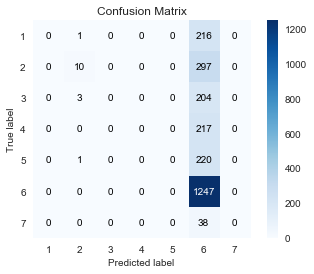

In [61]:
from scikitplot import plotters as skplt

skplt.plot_confusion_matrix(y_true=np.array(y_test), y_pred=lr.predict(X_test))
plt.show()

##### The majority of the correct predictions were for Medical.  All else was worse than the decision tree model. It appears that Medical category was overfit.

In [62]:
# evaluate the logistic model using 10-fold cross-validation
cross_scores_org = cross_val_score(lr, X_lr, y_lr, scoring='accuracy', cv=10)
print cross_scores_org
print cross_scores_org.mean()

[ 0.50365854  0.50121951  0.50853659  0.49878049  0.49756098  0.49877751
  0.499388    0.50245098  0.50184502  0.50553506]
0.501775266276


> # Logit Model

##### Logit does not work for Multi-class models

model_logit.pred_table()

> # K-nearest Neighbors (knn)
- You should choose the best k value first.

Text(0,0.5,'accuracy')

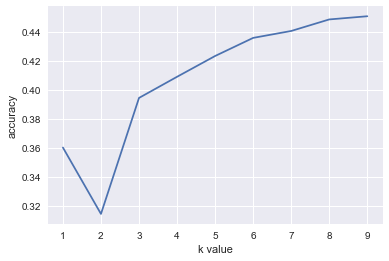

In [63]:
# search for an optimal value of K
k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn, X, y, cv=10, scoring='accuracy')))

# plot the K values (x-axis) versus the 10-fold CV score (y-axis)
plt.figure()
plt.plot(k_range, scores)
plt.xlabel('k value')
plt.ylabel('accuracy')



## Optimal k value using Grid Search 

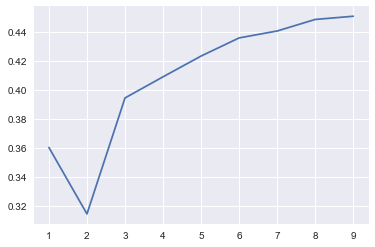

In [64]:
# automatic grid search for an optimal value of K
#http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html

from sklearn.grid_search import GridSearchCV

knn = KNeighborsClassifier()
k_range = range(1, 10)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

# check the results of the grid search
grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_]
plt.figure()
plt.plot(k_range, grid_mean_scores)
plt.show()


In [65]:
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.450531979944
{'n_neighbors': 9}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')


In [66]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn). 
# Use the optimal k value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [68]:
#Model evaluation without valdation
print  metrics.accuracy_score(y_test, knn.predict(X_test))
print  metrics.confusion_matrix(y_test, knn.predict(X_test))
print  metrics.classification_report(y_test, knn.predict(X_test))
#print  metrics.roc_auc_score(y_test, knn.predict(X_test))

0.529339853301
[[  40   45   26   11   11   84    0]
 [  31  128   30   15   10   93    0]
 [  24   47   33   14   13   76    0]
 [  14   23   16   21   14  129    0]
 [  29   31   18   17   21  105    0]
 [  45   49   19   46   32 1056    0]
 [   6    6    5    3    2   16    0]]
             precision    recall  f1-score   support

          1       0.21      0.18      0.20       217
          2       0.39      0.42      0.40       307
          3       0.22      0.16      0.19       207
          4       0.17      0.10      0.12       217
          5       0.20      0.10      0.13       221
          6       0.68      0.85      0.75      1247
          7       0.00      0.00      0.00        38

avg / total       0.46      0.53      0.49      2454



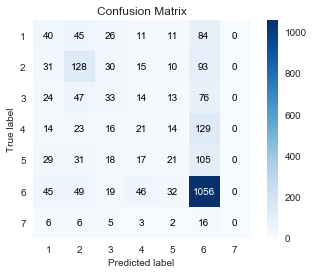

In [69]:
from scikitplot import plotters as skplt

skplt.plot_confusion_matrix(y_true=np.array(y_test), y_pred=knn.predict(X_test))
plt.show()

In [70]:
# evaluate the decision tree model using 10-fold cross-validation
scores = cross_val_score(knn, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.43658537  0.42195122  0.45121951  0.46341463  0.33536585  0.48410758
  0.46144431  0.48161765  0.46125461  0.50922509]
0.450618582513


> # Random Forest

In [71]:
# develop a random forest model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X, y)
clf.score(X,y)

0.90999143940320415

In [72]:
# generate evaluation metrics
print metrics.accuracy_score(y, clf.predict(X)) #overall accuracy
print metrics.confusion_matrix(y, clf.predict(X))
print metrics.classification_report(y, clf.predict(X))

0.909991439403
[[ 591   68   16   11   18   41    1]
 [  18  902   39    9    9   49    2]
 [  16   53  507    7    2   30    0]
 [   9   38   12  728   12   18    1]
 [  13   21   14    4  697   26    0]
 [  27   68   29   16   11 3925    1]
 [   5    9    2    1    4    6   91]]
             precision    recall  f1-score   support

          1       0.87      0.79      0.83       746
          2       0.78      0.88      0.82      1028
          3       0.82      0.82      0.82       615
          4       0.94      0.89      0.91       818
          5       0.93      0.90      0.91       775
          6       0.96      0.96      0.96      4077
          7       0.95      0.77      0.85       118

avg / total       0.91      0.91      0.91      8177



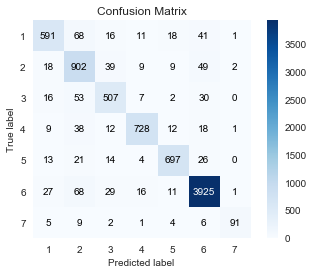

In [75]:
from scikitplot import plotters as skplt

skplt.plot_confusion_matrix(y_true=np.array(y), y_pred=clf.predict(X))
plt.show()

>The Random Forest model is by far the best model at 90% accuracy.

In [76]:
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), X.columns))

Features sorted by their rank:
[(0.1085, 'Breach_Type_CAT'), (0.2204, 'Breach_Year'), (0.3055, 'State_CAT'), (0.3656, 'Harm')]


In [77]:
# another method
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_})

,feature,importance
0,Breach_Year,0.220441
1,Harm,0.365585
2,Breach_Type_CAT,0.108493
3,State_CAT,0.305481


In [78]:
#Predict class probabilities for X
clf.predict_proba(X)

array([[ 0.1 ,  0.8 ,  0.  , ...,  0.1 ,  0.  ,  0.  ],
       [ 0.05,  0.05,  0.  , ...,  0.  ,  0.9 ,  0.  ],
       [ 0.6 ,  0.05,  0.  , ...,  0.15,  0.15,  0.  ],
       ..., 
       [ 0.  ,  1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  1.  ,  0.  ]])

> # Feature Selection

> ## SelectKBest & Decision Tree
- Run SelectKBest and develop a decision tree based on the results of SelectKBest
- use k = all

In [81]:
# SelectKBest
X_new = SelectKBest(chi2, k='all').fit_transform(X, y)
print X_new

[[ 2006  9290     5     0]
 [ 2007 67000     5     0]
 [ 2007 10500     5     0]
 ..., 
 [ 2017     0     2    52]
 [ 2018   607     7    52]
 [ 2018  4476     7    52]]


In [82]:
X.head(5)
# best predictors are breach type

,Breach_Year,Harm,Breach_Type_CAT,State_CAT
0,2006,9290,5,0
1,2007,67000,5,0
2,2007,10500,5,0
3,2007,69,5,0
4,2007,0,3,0


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
dt_model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [85]:
# build a decision tree model with those 4 variables 
# evaluate the model by splitting into train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
dt_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5)
dt_model.fit(X_train, y_train)

#dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4,min_samples_leaf=5)
#dt_simple = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)


#Model evaluation
print metrics.accuracy_score(y_test, dt_model.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt_model.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt_model.predict(X_test))
print "--------------------------------------------------------"
##print metrics.roc_auc_score(y_test, dt_model.predict(X_test))

0.573757131214
--------------------------------------------------------
[[   0   23   33   52    6  103    0]
 [   0  104   42   40    3  118    0]
 [   0   21   65   31    4   86    0]
 [   0   15   24   99    0   79    0]
 [   0   12   25   71   11  102    0]
 [   0   39    8   64    7 1129    0]
 [   0    3    4    8    0   23    0]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       217
          2       0.48      0.34      0.40       307
          3       0.32      0.31      0.32       207
          4       0.27      0.46      0.34       217
          5       0.35      0.05      0.09       221
          6       0.69      0.91      0.78      1247
          7       0.00      0.00      0.00        38

avg / total       0.49      0.57      0.51      2454

--------------------------------------------------------


In [87]:
# visualize decision tree
X_new_df = pd.DataFrame(X_new)
X_new_df = X_new_df.rename(columns={0: 'Breach_Year', 1: 'Harm', 2: 'Breach_Type_CAT', 3: 'State_CAT'})
tree.export_graphviz(dt_model, out_file='decisiontree_m.dot', feature_names=X_new_df.columns)

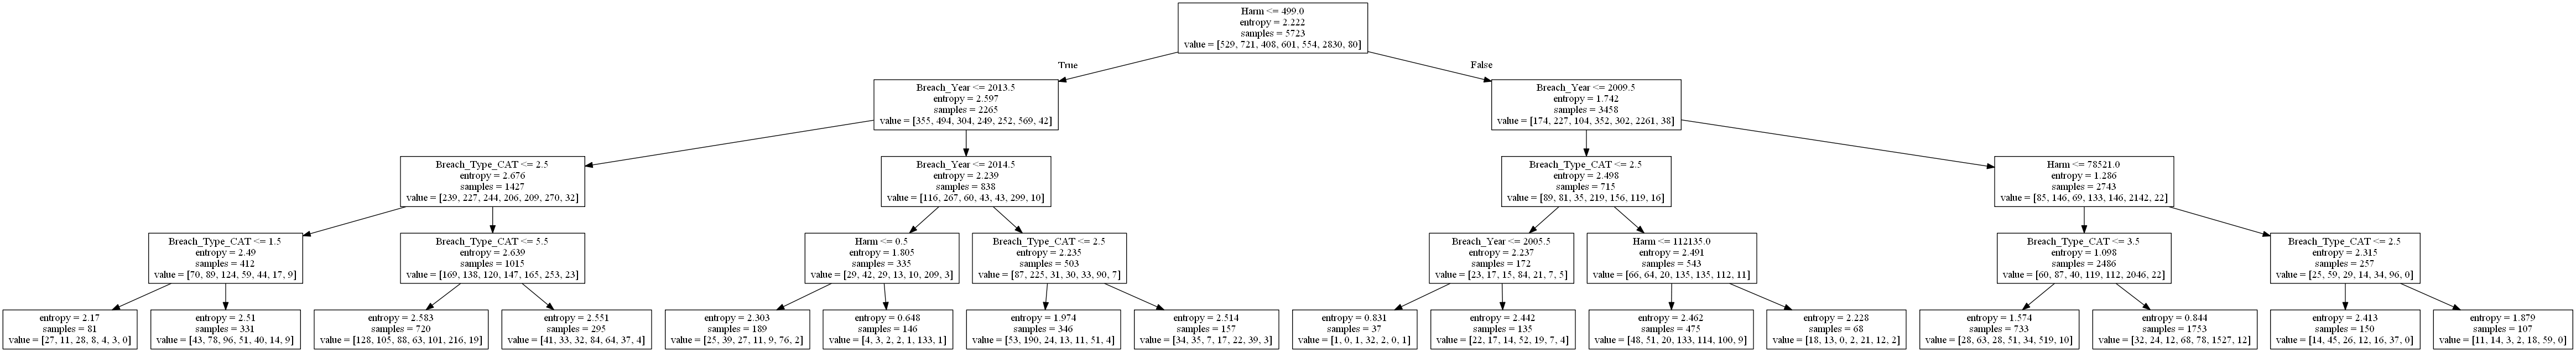

In [88]:
# embed the decision tree
from IPython.display import Image
Image("decisiontree_m.png")

>> # RFE
- Run RFE with logistic regression model
- 3 highest ranking X variables

In [89]:
# build logisticRegression
model = LogisticRegression()
# selecting 3 highest ranking X variables
rfe = RFE(model, 3)  #asking three best attributes
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)




[ True False  True  True]
[1 2 1 1]


In [90]:
# Features sorted by their rank
pd.DataFrame({'feature':X.columns, 'importance':rfe.ranking_})

,feature,importance
0,Breach_Year,1
1,Harm,2
2,Breach_Type_CAT,1
3,State_CAT,1


In [91]:
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: x, rfe.ranking_), X.columns))

Features sorted by their rank:
[(1, 'Breach_Type_CAT'), (1, 'Breach_Year'), (1, 'State_CAT'), (2, 'Harm')]


In [93]:
#select most significant features only 
X_logistic = df_stat[['Breach_Type_CAT', 'Breach_Year', 'State_CAT']]
print X_logistic.head()

   Breach_Type_CAT  Breach_Year  State_CAT
0                5         2006          0
1                5         2007          0
2                5         2007          0
3                5         2007          0
4                3         2007          0


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation
print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))
#print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.50814995925
[[   0    0    0    0    0  217    0]
 [   0    0    0    0    0  307    0]
 [   0    0    0    0    0  207    0]
 [   0    0    0    0    0  217    0]
 [   0    0    0    0    0  221    0]
 [   0    0    0    0    0 1247    0]
 [   0    0    0    0    0   38    0]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       217
          2       0.00      0.00      0.00       307
          3       0.00      0.00      0.00       207
          4       0.00      0.00      0.00       217
          5       0.00      0.00      0.00       221
          6       0.51      1.00      0.67      1247
          7       0.00      0.00      0.00        38

avg / total       0.26      0.51      0.34      2454



Logistic regression does not appear to work as well as other models.

>> # ExtraTreeClassifier

In [96]:
# build ExtraTreesClassifier
model_extra = ExtraTreesClassifier()
model_extra.fit(X, y)
model_extra.score(X, y)

# display the relative importance of each attribute
print(model_extra.feature_importances_)

[ 0.16014397  0.47988925  0.10042956  0.25953721]


In [97]:
# What are 5 highest ranking X variables according to ExtraTreeClassifier
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 5), model_extra.feature_importances_), X.columns))

Features sorted by their rank:
[(0.10043, 'Breach_Type_CAT'), (0.16014, 'Breach_Year'), (0.25954, 'State_CAT'), (0.47989, 'Harm')]


> Breach features are ranked higher than the breach types. Highest ranked is Breach_Type_CAT.